# Logistic Regression: Diabetes Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading data
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
# checking any null values in data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# getting basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# describing the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


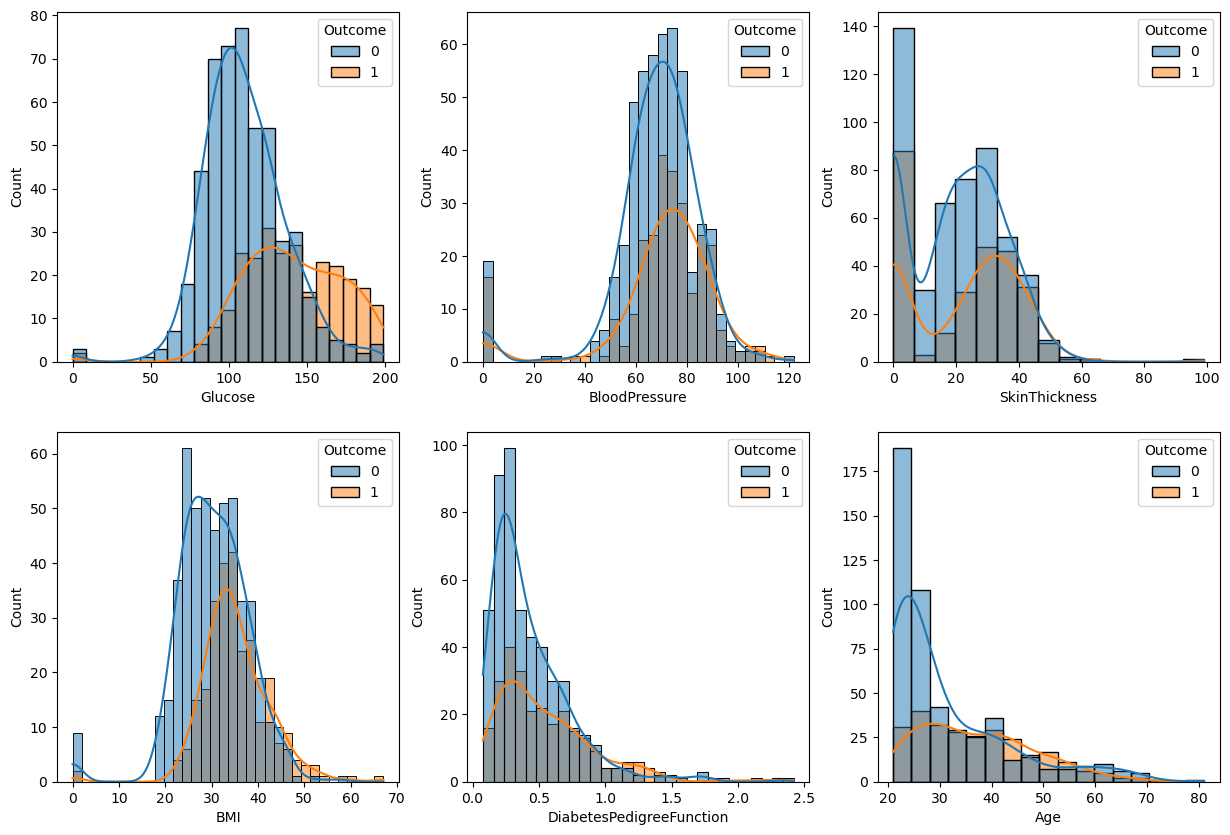

In [12]:
# visualizing the frequency of the features based on target feature
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.histplot(x='Glucose', hue='Outcome', data=df, kde=True, ax=axes[0][0])
sns.histplot(x='BloodPressure', hue='Outcome', data=df, kde=True, ax=axes[0][1])
sns.histplot(x='SkinThickness', hue='Outcome', data=df, kde=True, ax=axes[0][2])
sns.histplot(x='BMI', hue='Outcome', data=df, kde=True, ax=axes[1][0])
sns.histplot(x='DiabetesPedigreeFunction', hue='Outcome', data=df, kde=True, ax=axes[1][1])
sns.histplot(x='Age', hue='Outcome', data=df, kde=True, ax=axes[1][2])
plt.show()

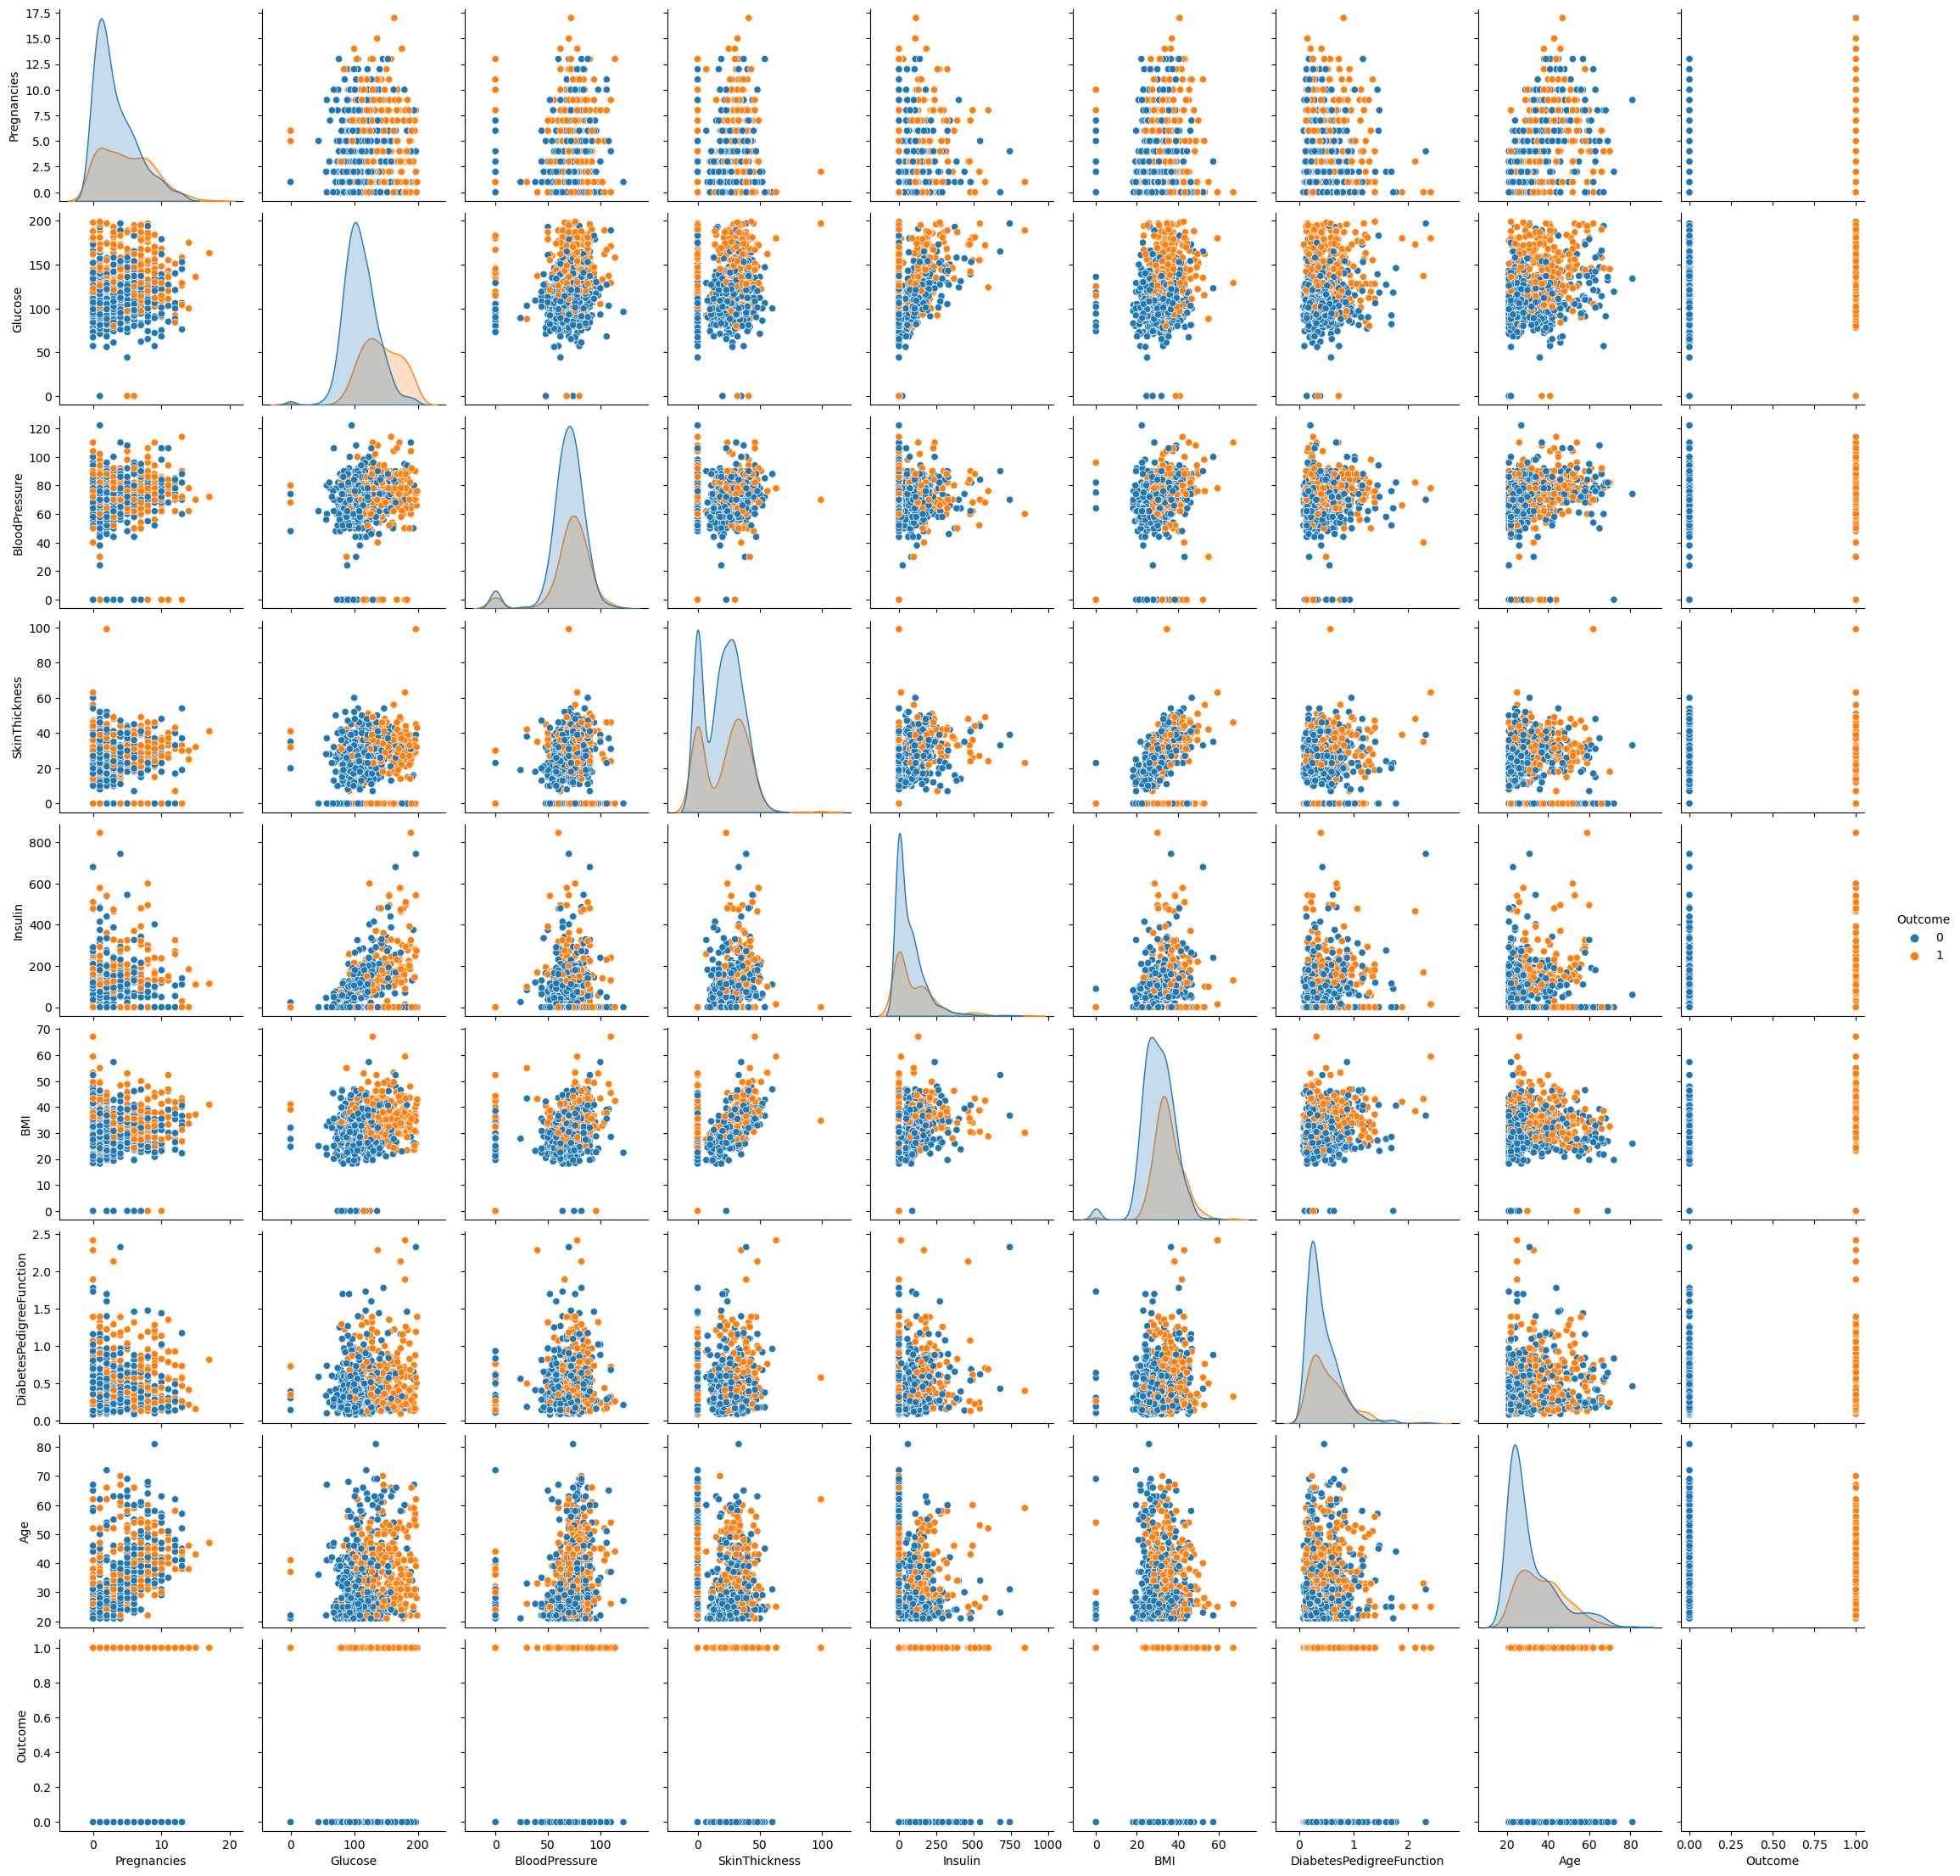

In [14]:
# visualizing the relationship between the features
sns.pairplot(vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], hue='Outcome', data=df)
plt.show()

In [15]:
# finding the correlation between features
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


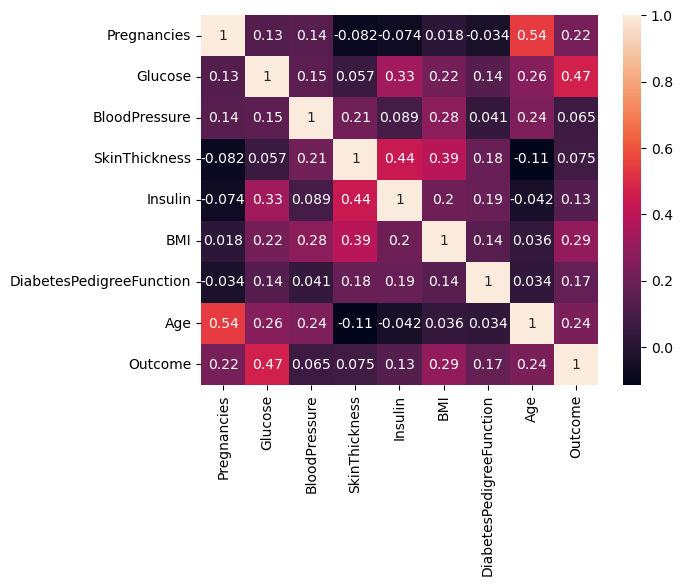

In [16]:
# visualizing the correlation with heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
# getting the correlation of independent features with the target feature
df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [21]:
# getting the variance in each features
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [26]:
# separating independent features and target feature from dataset
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
# scaling the independent features using Min Max Scaler method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [28]:
# selecting required and best independent features using Select K Best feature selection method 
from sklearn.feature_selection import SelectKBest, chi2
X = SelectKBest(chi2,k=7).fit_transform(X,y)
X.shape

(768, 7)

In [30]:
# spliting the datas into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
# building the logistic regression machine learning model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [33]:
# training the model using train set
log_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
# predicting the target with test set
y_predict = log_model.predict(X_test)

In [41]:
# calculating the metrics of the model 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
class_report = classification_report(y_test,y_predict)
print(class_report)
print(f'Cofusion Matrix:\n {confusion_matrix(y_test,y_predict)}\n')
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)*100}\n')
print(f'Recall Score: {recall_score(y_test,y_predict)*100}')

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.79      0.57      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.82      0.82      0.82       154

Cofusion Matrix:
 [[100   7]
 [ 20  27]]

Accuracy Score: 82.46753246753246

Recall Score: 57.446808510638306


### In medical field false negative should be avoided, so lets try to increase recall score

In [43]:
# finding the dataset is balanced or imbalanced
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

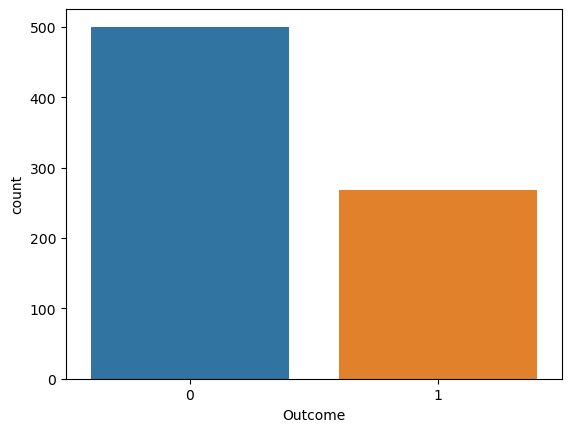

In [45]:
sns.countplot(x='Outcome',data=df)
plt.show()

In [46]:
# separating majority and minority data of outcome
df_maj = df[df['Outcome']==0]
df_min = df[df['Outcome']==1]

In [51]:
# using resample technique to make the dataset balanced
from sklearn.utils import resample
df_min_upsamp = resample(df_min,replace=True,n_samples=500,random_state=0)

In [54]:
# create new balanced dataset
df_upsamp = pd.concat([df_min_upsamp, df_maj])
df_upsamp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134,70,0,0,28.9,0.542,23,1
128,1,117,88,24,145,34.5,0.403,40,1
306,10,161,68,23,132,25.5,0.326,47,1
542,10,90,85,32,0,34.9,0.825,56,1
730,3,130,78,23,79,28.4,0.323,34,1


In [58]:
df_upsamp['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [63]:
# separating independent features and target feature of balanced dataset
X_new = df_upsamp.iloc[:,:-1].values
y_new = df_upsamp.iloc[:,-1].values

In [64]:
# scaling the independent features using Min Max Scaler method
X_new = scaler.fit_transform(X_new)

In [67]:
# using Stratified K Fold method to split train and test sets
from sklearn.model_selection import StratifiedKFold
sk_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

In [70]:
# using Recursive Feature Elimination method with Cross Validation to train and test the model
from sklearn.feature_selection import RFECV
rfecv = RFECV(log_model,scoring='recall',cv=sk_fold)

In [72]:
# fitting the model with balanced independent features and target feature
rfecv.fit(X_new,y_new)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
      estimator=LogisticRegression(), scoring='recall')

In [74]:
# predicting the target
y_new_predict = rfecv.predict(X_new)

In [78]:
# calculating the metrics of the model for the balanced dataset
print(classification_report(y_new,y_new_predict))
print(f'Recall Score: {recall_score(y_new,y_new_predict)*100}')

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       500
           1       0.75      0.73      0.74       500

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000

Recall Score: 73.4


### By balancing the data and using Recursive Feature Elimination method with Cross Validation , we have improved the recall score,  that is false negative is decreased